In [93]:
# Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
# Importing the dataset
df = pd.read_csv('nt_var4_prep.csv', sep=';')

In [95]:
df

,ActualPower,Max Capacity,Location 2,Location 4,Location 6,Location 8
0,8.491,43.5,0.718,0.970,0.874000,0.902
1,11.232,43.5,0.776,1.072,0.975000,0.985
2,8.989,43.5,0.862,1.240,1.122000,1.103
3,5.969,43.5,0.984,1.448,1.296000,1.230
4,4.637,43.5,1.116,1.627,1.440000,1.308
...,...,...,...,...,...,...
312,27.630,43.5,5.644,5.716,5.061000,4.836
313,26.432,43.5,6.042,6.137,5.157000,4.750
314,27.282,43.5,6.573,6.747,7.196924,4.716
315,28.285,43.5,7.268,7.558,5.693000,4.856


In [96]:
# Cheking correlations
df.corr()

,ActualPower,Max Capacity,Location 2,Location 4,Location 6,Location 8
ActualPower,1.000000,0.420251,0.302923,0.323568,0.248935,0.201316
Max Capacity,0.420251,1.000000,0.083967,0.095590,0.062411,0.047621
Location 2,0.302923,0.083967,1.000000,0.985472,0.965056,0.907740
Location 4,0.323568,0.095590,0.985472,1.000000,0.967973,0.897816
Location 6,0.248935,0.062411,0.965056,0.967973,1.000000,0.960079
Location 8,0.201316,0.047621,0.907740,0.897816,0.960079,1.000000


In [97]:
#Объясмняемой переменной явяляется переменная ActualPower. Объясняющими -  Max Capacity, Location 2, Location 4, Location 6, Location 8
#На объясняемую переменную больше всего оказывает влияние переменная Location 4, имеюшая корреляцию 0,32 с объясняемой 
#переменной ActualPower

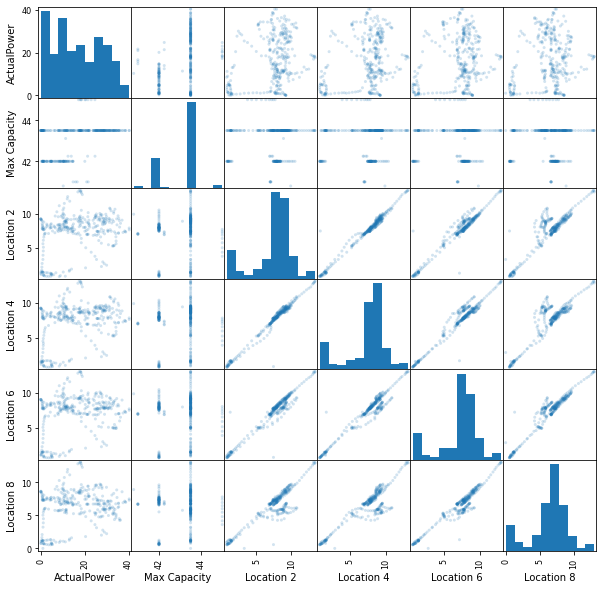

In [98]:
#Построение корреляционной матрицы в виде матрицы рассеивания
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [99]:
# Splitting the dataset into the Training set and Test set
#В качестве объясняемой переменной берём все строки и столбец ActualPower
#В качестве объясняющих переменных берём все строки и следующие столбцы: Max Capacity, Location 2, Location 4, Location 6, Location 8
#Для проверки прогнозного качества модели разделим все наблюдения на обучающую (80%) и тестовую выборки (20%).
X = df.iloc[:,1:6].values
y = df.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
# Fitting Simple Linear Regression to the Training set (Location 4)
#Обучение простой однофакторной линейной регрессии
#Для обучения простой линейной регрессии берём наиболее значимый фактор – Location 4.
#Обучение модели производим на множестве X_train (переменная Location 4) и Y_train (переменная ActualPower)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:,2:3], y_train)

In [101]:
# Getting parameters
sr.coef_, sr.intercept_

(array([1.26543236]), 8.013189225996209)

In [102]:
# Predicting the Test set results
# Для предсказания используем значение наиболее значимого фактора (Location 4) тестового множества.
y_pred = sr.predict(X_test[:, 2:3])

In [103]:
# Coefficient of determination R^2
train_mod=[]
train_mod.append(sr.score(X_train[:, 2:3], y_train))
test_mod = []
test_mod.append(sr.score(X_test[:, 2:3], y_test))
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:, 2:3], y_test)
#Коэффициент детерминации на обучающей выборке (0,0956) больше, чем на тестовой (0,0519).Качество модели очень низкое.

(0.09558439912558592, 0.05191950625303776)

In [104]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse=[]
train_mse.append(mean_squared_error(y_train, sr.predict(X_train[:, 2:3])))
test_mse = []
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sr.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(111.77977397690695, 110.08441485935597)

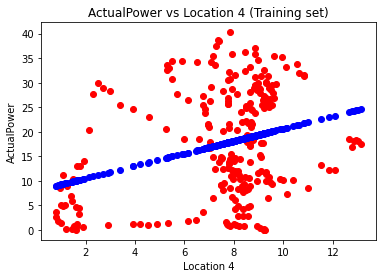

In [105]:
# Visualising the Training set results
#На графике отображена зависимость объяняемой переменнной ActualPower от объясняющей переменной Location 4  на обучающей выборке.
#Красными кругами отображены реальные данные, синими – прогнозные.
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sr.predict(X_train[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

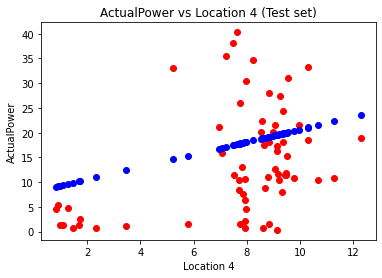

In [106]:
# Visualising the Test set results
#На графике отображена зависимость объяняемой переменнной ActualPower от объясняющей переменной Location 4 на тестовой выборке. 
#Красными кругами отображены реальные данные, синими – прогнозные. 
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sr.predict(X_test[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [107]:
# Fitting Multiple Linear Regression to the Training set
# Обучение модели множественной регрессии
#Для построения множественной регрессии используем все  объясняющие переменные тестового множества (X_train).
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [108]:
# Getting parameters
mr.coef_, mr.intercept_

(array([ 5.35309007, -2.44272113,  7.06609828, -3.36761918, -0.20974753]),
 -222.30033938340227)

In [109]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [110]:
# Coefficient of determination R^2
# В модели множественной регрессии коэффициент детерминации выше и на обучающей и на тестовой выборке. Модель является
#переобученной, так как коэффициент детерминации на обучающей выборке значительно выше, чем на тестовой
train_mod.append(mr.score(X_train, y_train))
test_mod.append(mr.score(X_test, y_test))
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.3263687118653882, 0.08174888527021162)

In [111]:
# Mean squared error
# В модели множественной регрессии среднеквадратическая ошибка и на обучающей и на тестовой выборке.
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, mr.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(83.25636251592636, 106.6208379200756)

In [112]:
#p-values
#Построение линейной модели с помощью библиотеки statsmodels.api
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 =sm.OLS(y_train, X).fit()
mr1.pvalues
mr1.summary()
#Делаем вывод, что переменные х5 (Location 8) не значима.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     23.93
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.29e-19
Time:                        20:03:45   Log-Likelihood:                -918.36
No. Observations:                 253   AIC:                             1849.
Df Residuals:                     247   BIC:                             1870.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -222.3003     32.012     -6.944      0.000    -285.351    -159.250
x1             5.3531      0.742      7.213      0.000       3.891       6.815
x2            -2.4427      2.302     -1.061      0.290      -6.978       2.092
x3             7.0661      2.293      3.082      0.002       2.550      11.582
x4            -3.3676      1.386     -2.430      0.016      -6.097      -0.638
x5            -0.2097      0.855     -0.245      0.806      -1.894       1.475
==============================================================================
Omnibus:                        4.798   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                3.126
Skew:                          -0.077   Prob(JB):                        0.209
Kurtosis:                       2.478   Cond. No.                     2.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

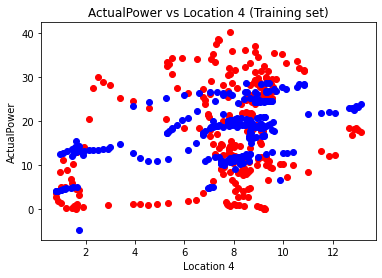

In [113]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], mr.predict(X_train), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

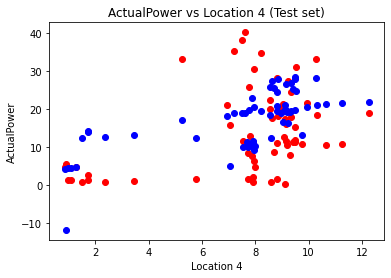

In [114]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [115]:
# Fitting Polynomial Regression to the dataset
# Степень полинома возьмем равной 9 (degree = 9)
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures(degree = 9).fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures(degree = 9).fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [116]:
# Getting parameters
pr.coef_, pr.intercept_

(array([-7.07795346e+02,  7.23414042e+02, -3.73102314e+02,  1.10406540e+02,
        -1.98397712e+01,  2.19846452e+00, -1.46611034e-01,  5.39059631e-03,
        -8.39048935e-05]),
 266.6354096182622)

In [117]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [118]:
# Coefficient of determination R^2
train_mod.append(pr.score(X_train_p[:,1:], y_train))
test_mod.append(pr.score(X_test_p[:,1:], y_test))
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.20444274245783056, 0.04966222369618423)

In [119]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, pr.predict(X_train_p[:,1:])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(98.32560423302557, 110.3465145767137)

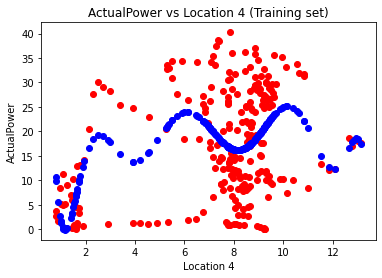

In [120]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

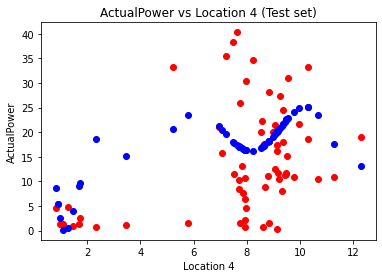

In [121]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [122]:
# Backward Elimination with p-values
#Построим модель на основании значимых факторов (с уровнем значимости 5%) для чего используем метод обратного исключения
#(Backward Elimination)
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, :5]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [123]:
X_train[:, :5]

array([[43.5       ,  1.227     ,  1.733     ,  7.19692381,  1.316     ],
       [43.5       ,  2.203     ,  2.308     ,  2.253     ,  1.997     ],
       [43.5       ,  9.173     ,  9.286     ,  7.734     ,  5.512     ],
       ...,
       [41.        ,  6.995     ,  7.014     ,  6.917     ,  6.644     ],
       [43.5       ,  8.005     ,  8.104     ,  8.299     ,  7.882     ],
       [42.        ,  7.708     ,  7.593     ,  7.692     ,  6.774     ]])

In [124]:
#Значимыми переменными оказались Max Capacity, Location 4, Location 6
X_Modeled

array([[43.5       ,  1.733     ,  7.19692381],
       [43.5       ,  2.308     ,  2.253     ],
       [43.5       ,  9.286     ,  7.734     ],
       [43.5       ,  2.495     ,  2.456     ],
       [42.25      ,  6.936     ,  6.883     ],
       [43.5       ,  8.519     ,  8.538     ],
       [43.5       ,  8.475     ,  6.226     ],
       [45.        ,  7.556     ,  7.659     ],
       [43.5       , 12.65      , 12.58      ],
       [43.5       ,  9.547     ,  9.994     ],
       [43.5       ,  6.754     ,  6.79      ],
       [43.5       ,  7.837     ,  7.671     ],
       [43.5       ,  7.413     ,  7.252     ],
       [43.5       ,  1.628     ,  1.029     ],
       [43.5       ,  8.66      ,  9.075     ],
       [42.        ,  8.165     ,  8.043     ],
       [42.        ,  8.614     ,  8.696     ],
       [42.        ,  8.199     ,  8.08      ],
       [43.5       ,  7.75      ,  7.747     ],
       [43.5       ,  5.392     ,  5.013     ],
       [43.5       ,  8.465     ,  6.477

In [125]:
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, [0,2,3]], y_train)

In [126]:
# Getting parameters
omr.coef_, omr.intercept_

(array([ 5.32408046,  5.00735838, -4.01382445]), -220.55672177840836)

In [127]:
# Predicting the Test set results
y_pred = omr.predict(X_test[:, [0,2,3]])

In [128]:
# Coefficient of determination R^2
# Коэффициент детерминации на обучающей выборке практически такой же как и в модели множественной регрессии, построенной 
# на всех факторах, но на тестовой выборке он выше, что свидетельствует о меньшем переобучении модели
train_mod.append(omr.score(X_train[:, [0,2,3]], y_train))
test_mod.append(omr.score(X_test[:, [0,2,3]], y_test))
omr.score(X_train[:, [0,2,3]], y_train), omr.score(X_test[:, [0,2,3]], y_test)

(0.32248092219785607, 0.13801481105478386)

In [129]:
# Mean squared error
# Среднеквадратическая ошибка на обучающей и тестовой выборках также меньше, чем в модели множественной регрессии, 
# построенной на всех факторах
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, omr.predict(X_train[:, [0,2,3]])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, omr.predict(X_train[:, [0,2,3]])), mean_squared_error(y_test, y_pred)

(83.73686755131753, 100.08763577387921)

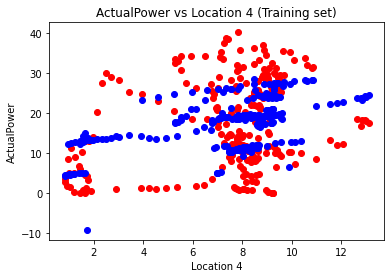

In [130]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], omr.predict(X_train[:, [0,2,3]]), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

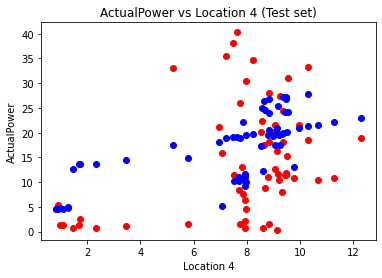

In [131]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], omr.predict(X_test[:, [0,2,3]]), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [132]:
# Creating dataset with metrics
model=['sr', 'mr', 'pr', 'omr']
metrics_df=pd.DataFrame()
metrics_df['model']=model
metrics_df['train_r2']=train_mod
metrics_df['test_r2']=test_mod
metrics_df['train_mse']=train_mse
metrics_df['test_mse']=test_mse
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.095584,0.051920,111.779774,110.084415
1,mr,0.326369,0.081749,83.256363,106.620838
2,pr,0.204443,0.049662,98.325604,110.346515
3,omr,0.322481,0.138015,83.736868,100.087636


In [ ]:
#Лучшей моделью с наибольшим коэффициентом детерминации на обучающей и тестовой выборке, а также наименьшей 
#среднеквадратической ошибкой на обучающей и тестовой выборке является оптимальная модель, построенная на значимых факторах.